## Problem 1

For this problem we will ask you to perform three tasks. 

1. Write functions that produce various $2 \times 2$ numpy matrices. 
     * A function R that takes an argument t, which returns the matrix that performs counter-clockwise rotation by t radians. 
     *  A function M that takes an argument t, which returns the matrix that performs mirror-reflection across the line through the origin that has angle t with the x-axis. 
     *  A function S that takes an argument t, which returns the matrix that scales the x-coordinate by t, and leaves the y-coordinate fixed. 
    
2. Write a function that checks to see whether or not the identity $$M(t/2)M(0) = R(t)$$ is holds (if not, it should at least hold to **high degree of precision**), and check for at least $5$ different values of $t$ with $0 < t < \pi/2$. 

3.  Generate a plot of the function $y=\cos(x^2)$ in the plane, with $-1 \leq x \leq 3$.  Use matplotlib to plot it, together with a rotation and mirror reflection (choose a $0 < t < \pi/6$) and a scaling (with $t=1/3$).  Use different colours for the transformed graphs.

Populating the interactive namespace from numpy and matplotlib
t: 0 result: True
t: 0.5235987755982988 result: True
t: 0.6283185307179586 result: True
t: 0.7853981633974483 result: True
t: 1.0471975511965976 result: True
t: 1.5707963267948966 result: True


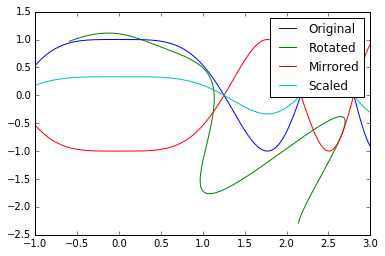

In [78]:
%pylab inline
## Part 1

def R(t):
    """
    Takes an argument t, which returns the matrix that performs counter-clockwise rotation by t radians.
    
    Returns the rotatation matrix.
    """
    from numpy import matrix, sin, cos
    return matrix([
        [cos(t), -1*sin(t)],
        [sin(t), cos(t)]
    ])
    
def M(t):
    """
    Takes an argument t, which returns the matrix that performs mirror-reflection across the line through
    the origin that has angle t with the x-axis.
    
    Returns the mirror-reflected matrix.
    """
    from numpy import matrix, sin, cos
    return matrix([
        [cos(2*t), sin(2*t)],
        [sin(2*t), -1*cos(2*t)]
    ])
    
def S(t):
    """
    Takes an argument t, which returns the matrix that scales the x-coordinate by t, and leaves the y-coordinate fixed.
    
    Returns the scaled matrix.
    """
    from numpy import matrix
    return matrix([
        [1, 0],
        [0, t]
    ])

## Part 2
def check_identity_for_part_2(t):
    return (M(t/2) * M(0) == R(t)).all()

from numpy import pi
for t in [0, pi / 6, pi / 5, pi / 4, pi / 3, pi / 2]:
    print("t:", t, "result:", check_identity_for_part_2(t))


## Part 3
from numpy import linspace, cos, matrix, zeros
from matplotlib import pyplot

def apply_transform(transform, x_set, y_set):
    assert len(x_set) == len(y_set)
    assert len(transform) == 2
    new_x_set = zeros(len(x_set))
    new_y_set = zeros(len(y_set))
    for i, _ in enumerate(x_set):
        out = matrix([[
            x_set[i],
            y_set[i]
        ]]).dot(transform).A
        new_x_set[i] = out[0][0]
        new_y_set[i] = out[0][1]
        
    return (new_x_set, new_y_set)

x_set = linspace(-1, 3, 200)
y_set = [cos(x**2) for x in x_set]


pyplot.plot(x_set, y_set, label="Original")

rot_x_set, rot_y_set = apply_transform(R(pi / 6), x_set, y_set)
pyplot.plot(rot_x_set, rot_y_set, label="Rotated")

mir_x_set, mir_y_set = apply_transform(M(0), x_set, y_set)
pyplot.plot(mir_x_set, mir_y_set, label="Mirrored")

sca_x_set, sca_y_set = apply_transform(S(1 / 3), x_set, y_set)
pyplot.plot(sca_x_set, sca_y_set, label="Scaled")

pyplot.legend()
